In [1]:
import cv2
import numpy as np
from zipfile import ZipFile
import os
from os.path import basename
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 
from keras.preprocessing import image 
from tensorflow.keras.utils import load_img, img_to_array
import os
import string 
import csv
import PIL 
from PIL import Image

Train Digits using local dataset 

In [2]:
from tensorflow.keras.layers import Dropout, BatchNormalization

training_dir = r"D:\OneDrive - dsusth\Study\B2 Year\Machine Learning and Data Mining II\Project\Train1\Train1\Train_digits"
train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (50, 50),
    class_mode = 'categorical'
    )

model_digits = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (50, 50,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

model_digits.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
       metrics = ["accuracy"])
validation_dir = r"D:\OneDrive - dsusth\Study\B2 Year\Machine Learning and Data Mining II\Project\Train1\Train1\Valid_digits"
valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size = (50, 50),
    class_mode = 'categorical'
    )
history = model_digits.fit(
    train_generator,
    epochs= 5,
    validation_data=valid_generator
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Train1\\Train1\\Train_digits'

Train for Letters

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

training_dir = r"Train1\Train1\train"
train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (50, 50),
    class_mode = 'categorical'
    )

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (50, 50,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
    ])

model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
       metrics = ["accuracy"])
validation_dir = r"Train1\Train1\valid"
valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size = (50, 50),
    class_mode = 'categorical'
    )
history = model.fit(
    train_generator,
    epochs= 10,
    validation_data=valid_generator
)

Found 37129 images belonging to 26 classes.
Found 15703 images belonging to 26 classes.
Epoch 1/10
1161/1161 [==============================] - 1338s 1s/step - loss: 0.8450 - accuracy: 0.7578 - val_loss: 0.5630 - val_accuracy: 0.8463
Epoch 2/10
1161/1161 [==============================] - 1994s 2s/step - loss: 0.3242 - accuracy: 0.8994 - val_loss: 0.4546 - val_accuracy: 0.8809
Epoch 3/10
  77/1161 [>.............................] - ETA: 35:23 - loss: 0.2520 - accuracy: 0.9152

KeyboardInterrupt: 

Predict Funtion

In [ ]:
img1 = cv2.imread(r"D:\OneDrive - dsusth\Study\B2 Year\Machine Learning and Data Mining II\Project\Image\main_folders\folder_0\subfolder_0\letter_4.jpg")
img2 = cv2.imread(r"D:\OneDrive - dsusth\Study\B2 Year\Machine Learning and Data Mining II\Project\Image\main_folders\folder_2\subfolder_0\letter_1.jpg")
def predict_digits(model, image):
    img = cv2.resize(image,(50, 50))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    image_tensor = np.vstack([x])
    classes = model.predict(image_tensor)
    print(classes)
    Alphabet_Mapping_Number_List = list(string.digits)

    Max = 0
    for i in range(len(classes[0])):
        if(Max < classes[0][i]):
            Max = classes[0][i]
    for i in range(len(classes[0])):
        if (Max == classes[0][i]):
            return(Alphabet_Mapping_Number_List[i])

def predict_letter(model, image):
    img = cv2.resize(image,(50,50))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    image_tensor = np.vstack([x])
    classes = model.predict(image_tensor)
    print(classes)
    Alphabet_Mapping_Upper_List = list(string.ascii_uppercase)
    Alphabet_Mapping_Lower_List = list(string.ascii_lowercase)
    Letter = Alphabet_Mapping_Upper_List 

    Max = 0
    for i in range(len(classes[0])):
        if(Max < classes[0][i]):
            Max = classes[0][i]
    for i in range(len(classes[0])):
        if (Max == classes[0][i]):
            return(Letter[i])
        

print(predict_letter(model, img1))
print(predict_digits(model_digits, img2))

1/1 [==============================] - 4s 4s/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]]
S
1/1 [==============================] - 0s 149ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
8


Detect Studend card & bounding box

In [ ]:
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import math
class HoughBundler:     
    def __init__(self,min_distance=5,min_angle=2):
        self.min_distance = min_distance
        self.min_angle = min_angle
    
    def get_orientation(self, line):
        orientation = math.atan2(abs((line[3] - line[1])), abs((line[2] - line[0])))
        return math.degrees(orientation)

    def check_is_line_different(self, line_1, groups, min_distance_to_merge, min_angle_to_merge):
        for group in groups:
            for line_2 in group:
                if self.get_distance(line_2, line_1) < min_distance_to_merge:
                    orientation_1 = self.get_orientation(line_1)
                    orientation_2 = self.get_orientation(line_2)
                    if abs(orientation_1 - orientation_2) < min_angle_to_merge:
                        group.append(line_1)
                        return False
        return True

    def distance_point_to_line(self, point, line):
        px, py = point
        x1, y1, x2, y2 = line

        def line_magnitude(x1, y1, x2, y2):
            line_magnitude = math.sqrt(math.pow((x2 - x1), 2) + math.pow((y2 - y1), 2))
            return line_magnitude

        lmag = line_magnitude(x1, y1, x2, y2)
        if lmag < 0.00000001:
            distance_point_to_line = 9999
            return distance_point_to_line

        u1 = (((px - x1) * (x2 - x1)) + ((py - y1) * (y2 - y1)))
        u = u1 / (lmag * lmag)

        if (u < 0.00001) or (u > 1):
            #// closest point does not fall within the line segment, take the shorter distance
            #// to an endpoint
            ix = line_magnitude(px, py, x1, y1)
            iy = line_magnitude(px, py, x2, y2)
            if ix > iy:
                distance_point_to_line = iy
            else:
                distance_point_to_line = ix
        else:
            # Intersecting point is on the line, use the formula
            ix = x1 + u * (x2 - x1)
            iy = y1 + u * (y2 - y1)
            distance_point_to_line = line_magnitude(px, py, ix, iy)

        return distance_point_to_line

    def get_distance(self, a_line, b_line):
        dist1 = self.distance_point_to_line(a_line[:2], b_line)
        dist2 = self.distance_point_to_line(a_line[2:], b_line)
        dist3 = self.distance_point_to_line(b_line[:2], a_line)
        dist4 = self.distance_point_to_line(b_line[2:], a_line)

        return min(dist1, dist2, dist3, dist4)

    def merge_lines_into_groups(self, lines):
        groups = []  # all lines groups are here
        # first line will create new group every time
        groups.append([lines[0]])
        # if line is different from existing gropus, create a new group
        for line_new in lines[1:]:
            if self.check_is_line_different(line_new, groups, self.min_distance, self.min_angle):
                groups.append([line_new])

        return groups

    def merge_line_segments(self, lines):
        orientation = self.get_orientation(lines[0])
      
        if(len(lines) == 1):
            return np.block([[lines[0][:2], lines[0][2:]]])

        points = []
        for line in lines:
            points.append(line[:2])
            points.append(line[2:])
        if 45 < orientation <= 90:
            #sort by y
            points = sorted(points, key=lambda point: point[1])
        else:
            #sort by x
            points = sorted(points, key=lambda point: point[0])

        return np.block([[points[0],points[-1]]])

    def process_lines(self, lines):
        lines_horizontal  = []
        lines_vertical  = []
  
        for line_i in [l[0] for l in lines]:
            orientation = self.get_orientation(line_i)
            # if vertical
            if 45 < orientation <= 90:
                lines_vertical.append(line_i)
            else:
                lines_horizontal.append(line_i)

        lines_vertical  = sorted(lines_vertical , key=lambda line: line[1])
        lines_horizontal  = sorted(lines_horizontal , key=lambda line: line[0])
        merged_lines_all = []

        # for each cluster in vertical and horizantal lines leave only one line
        for i in [lines_horizontal, lines_vertical]:
            if len(i) > 0:
                groups = self.merge_lines_into_groups(i)
                merged_lines = []
                for group in groups:
                    merged_lines.append(self.merge_line_segments(group))
                merged_lines_all.extend(merged_lines)
                    
        return np.asarray(merged_lines_all)

def slope(x1,y1,x2,y2):
    ###finding slope
    if x2!=x1:
        return((y2-y1)/(x2-x1))
    else:
        return 'NA'

def drawLine(image,x1,y1,x2,y2):

    m=slope(x1,y1,x2,y2)
    h,w=image.shape[:2]
    if m!='NA':
        ### here we are essentially extending the line to x=0 and x=width
        ### and calculating the y associated with it
        ##starting point
        px=0
        py=-(x1-0)*m+y1
        ##ending point
        qx=w
        qy=-(x2-w)*m+y2
    else:
    ### if slope is zero, draw a line with x=x1 and y=0 and y=height
        px,py=x1,0
        qx,qy=x1,h
    cv2.line(image, (int(px), int(py)), (int(qx), int(qy)), (255, 255, 255), 1)

def get_contour_areas(contours):
    all_areas = []
    for cnt in contours:
        area= cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

def rearrange_points(corners):
  # Find center
  center = [0]*2
  for i in range(corners.shape[0]):
    center[0] += corners[i][0][0]
    center[1] += corners[i][0][1]
  center[0] /= 4
  center[1] /= 4

  rearranged = [None]*4
  for i in range(4):
    if corners[i][0][0] < center[0] and corners[i][0][1] > center[1]:
      rearranged[i] = 0
    elif corners[i][0][0] > center[0] and corners[i][0][1] > center[1]:
      rearranged[i] = 1
    elif corners[i][0][0] > center[0] and corners[i][0][1] < center[1]:
      rearranged[i] = 2
    elif corners[i][0][0] < center[0] and corners[i][0][1] < center[1]:
      rearranged[i] = 3

  corners_copy = [None]*4
  for i in range(4):
    corners_copy[rearranged[i]] = [corners[i][0].tolist()]
  return corners_copy

def getWordContours(image):
  kernel = np.ones((5,5), np.uint8)
  mask = cv2.erode(image, kernel, iterations = 2)
  ret,thresh = cv2.threshold(mask,90,255,cv2.THRESH_BINARY_INV)
  contours, _ = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
  contours_copy = []
  for c in contours:
    if cv2.contourArea(c) < 100:
      continue
    contours_copy.append(c)
  return contours_copy

def getLetterContours(image):
  contours, _ = cv2.findContours(image, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
  return contours

def flipBit(image):
  copy = np.array(image, copy = True)
  for i in range(len(copy)):
    for j in range(len(copy[i])):
      if copy[i][j] == 255:
        copy[i][j] = 0
      else:
        copy[i][j] = 255
  return copy

def getImage(image, coor):
  return image[coor[1]:coor[1]+coor[3], coor[0]:coor[0]+coor[2]]


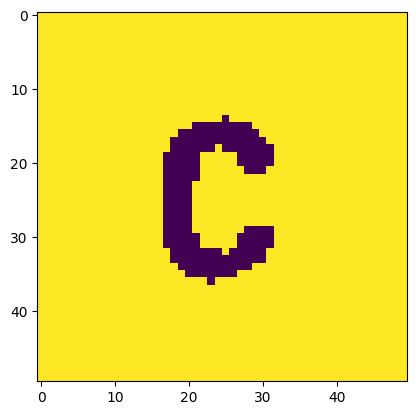

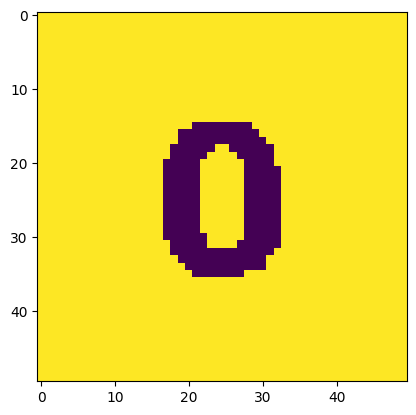

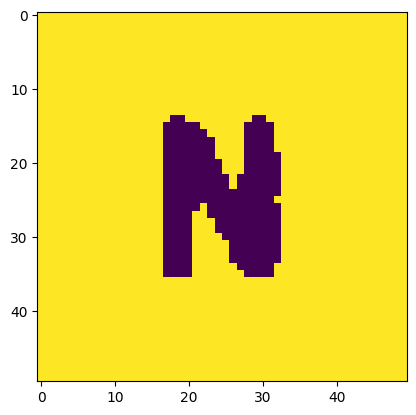

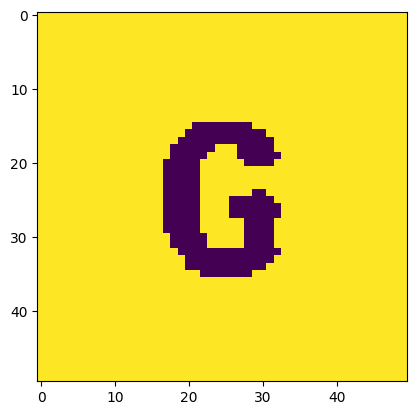

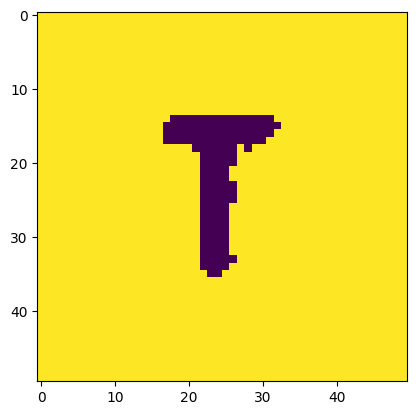

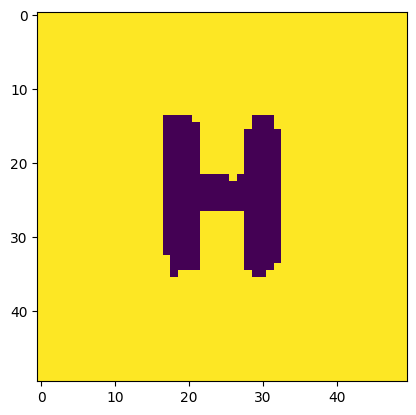

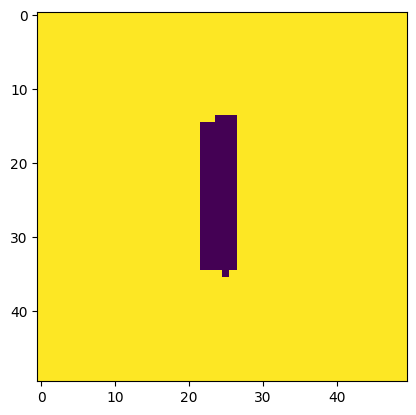

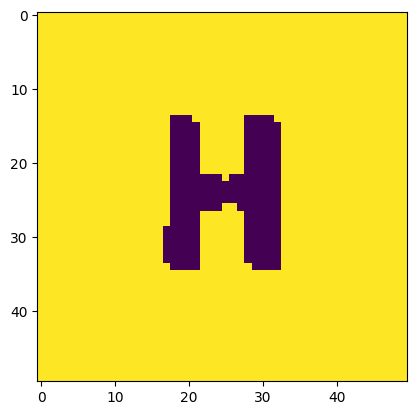

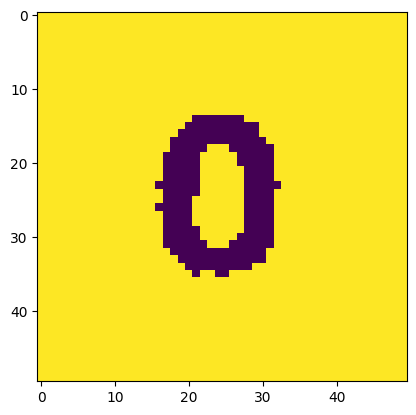

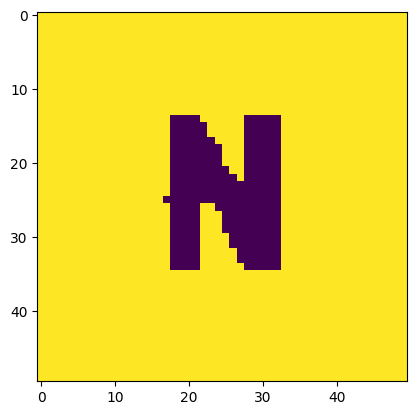

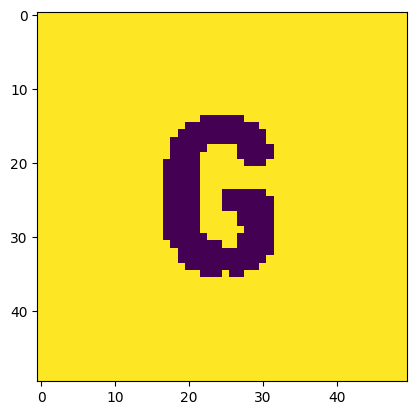

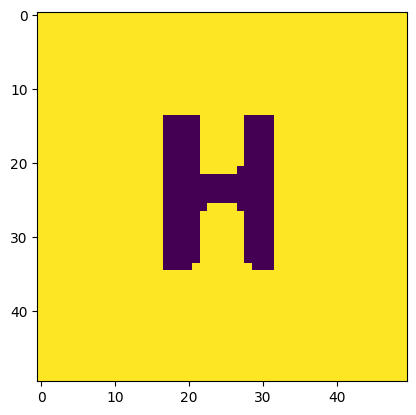

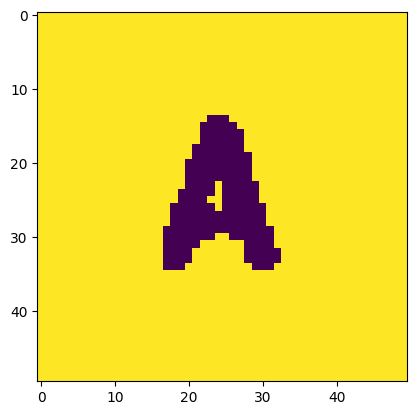

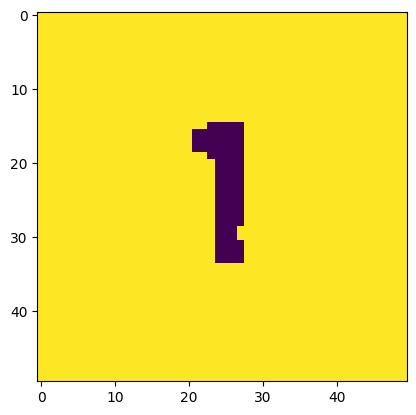

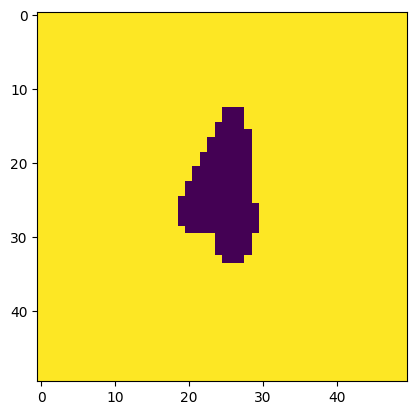

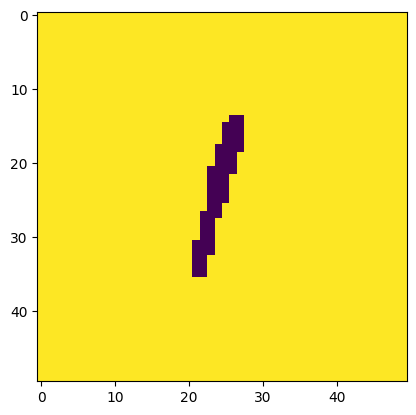

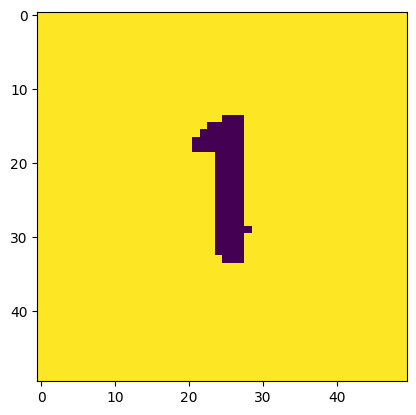

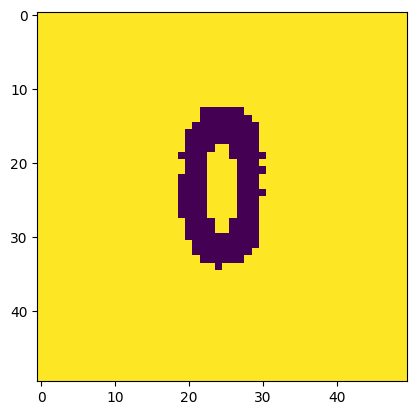

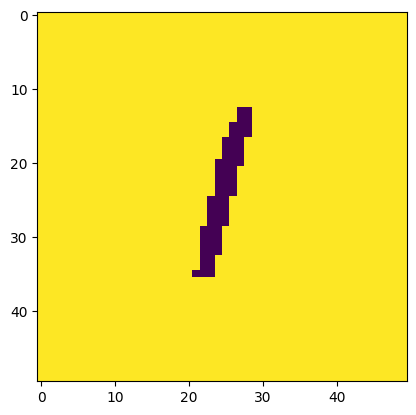

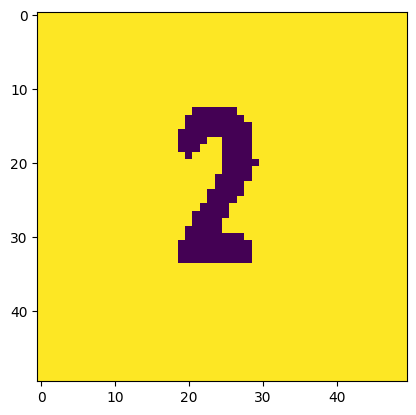

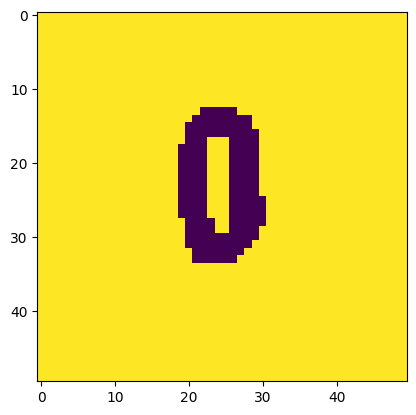

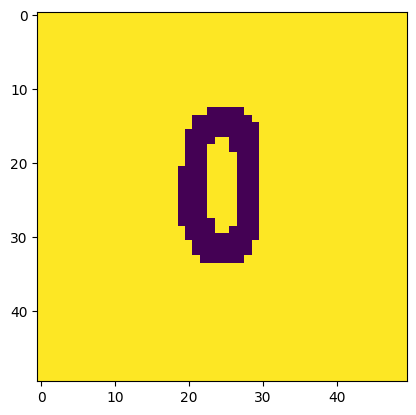

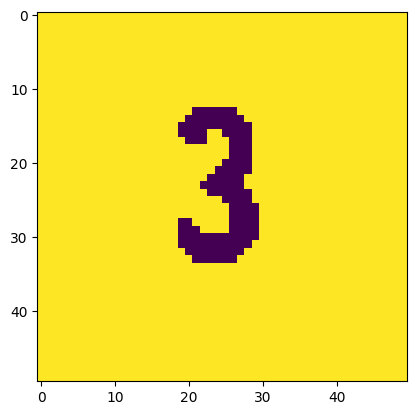

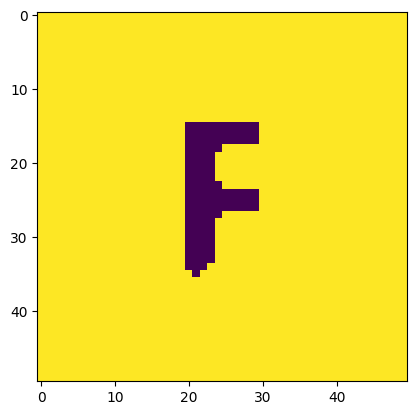

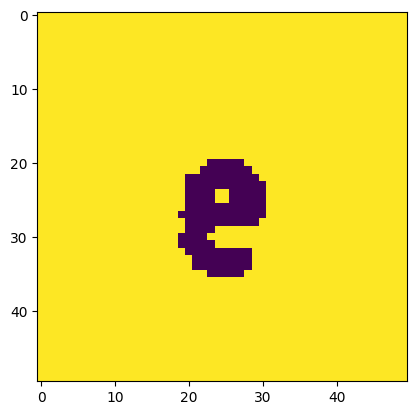

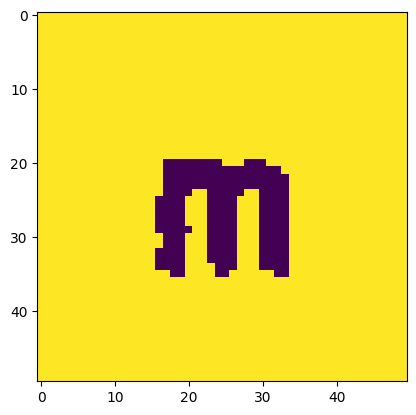

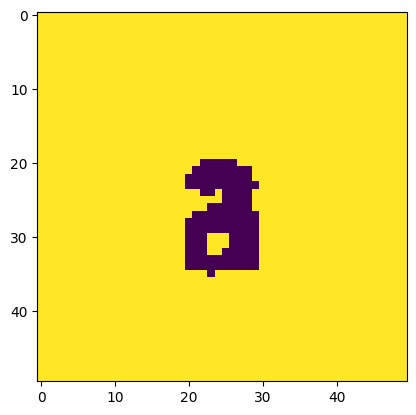

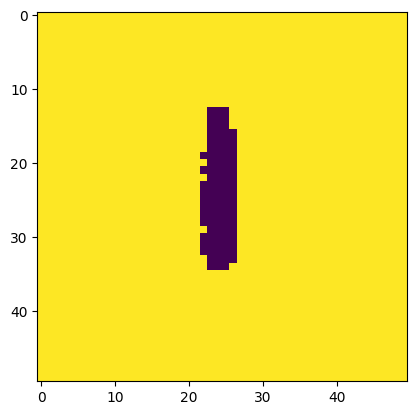

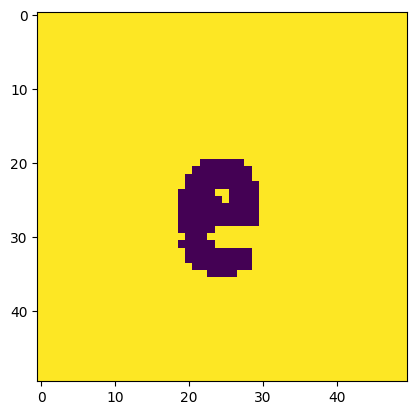

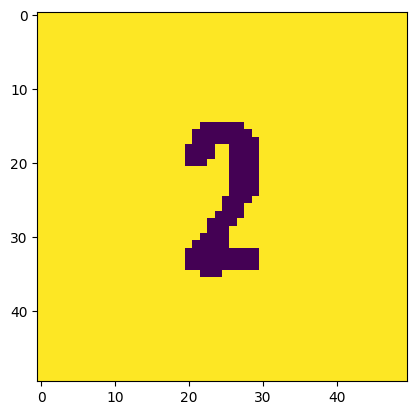

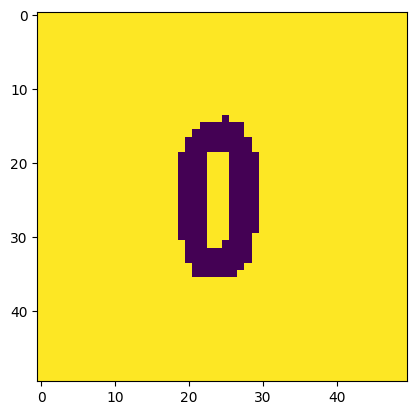

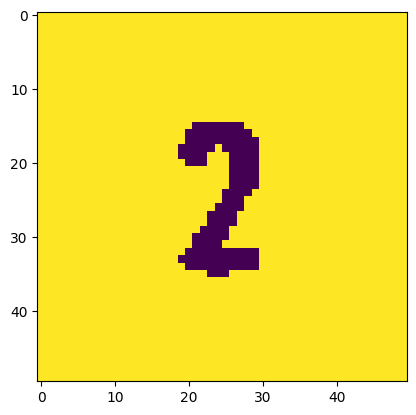

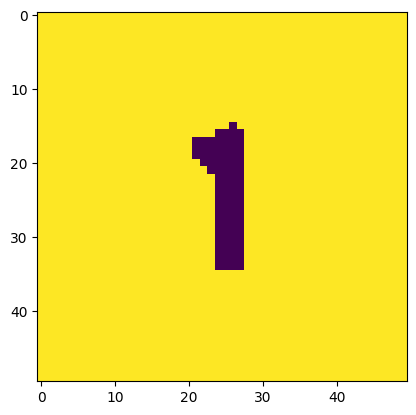

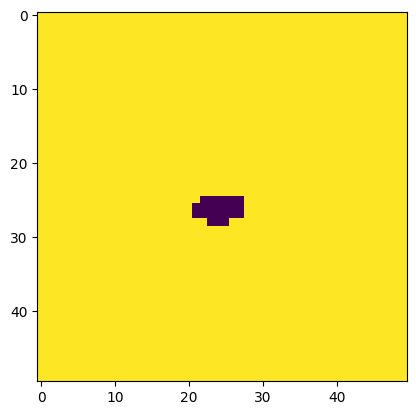

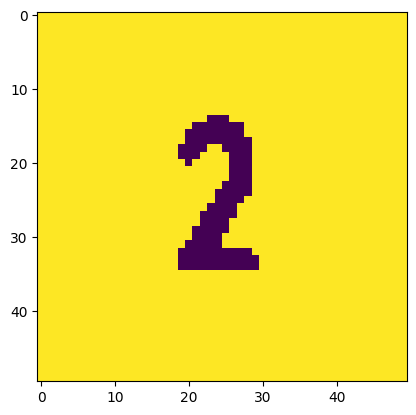

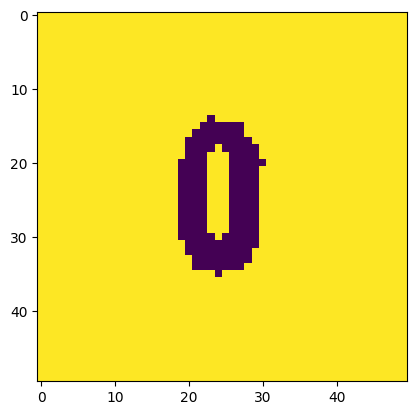

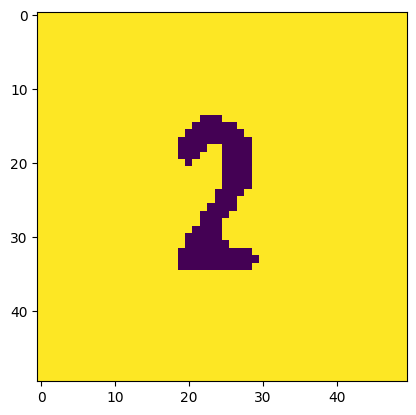

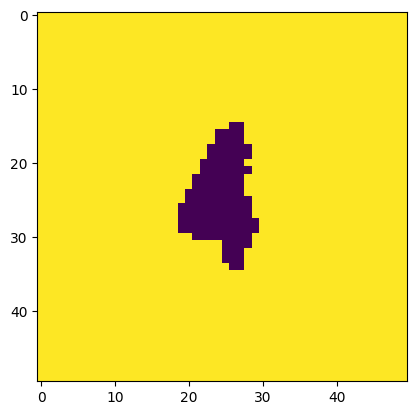

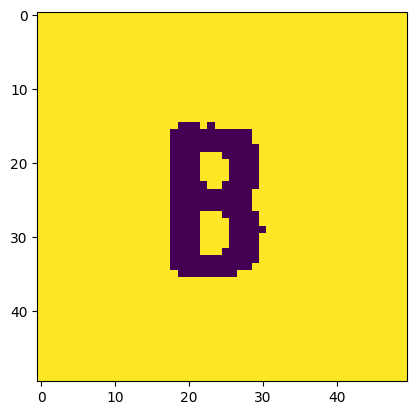

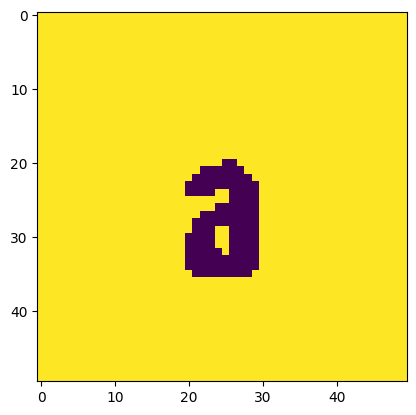

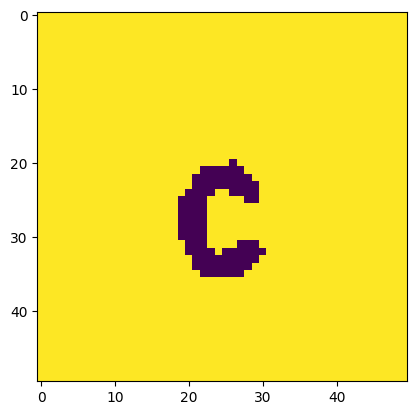

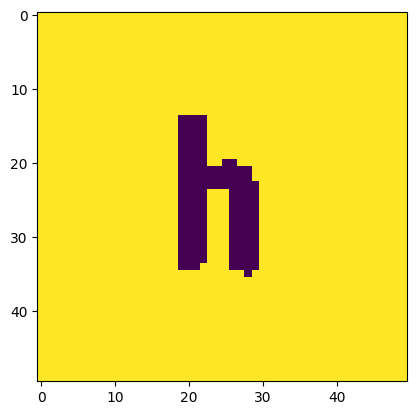

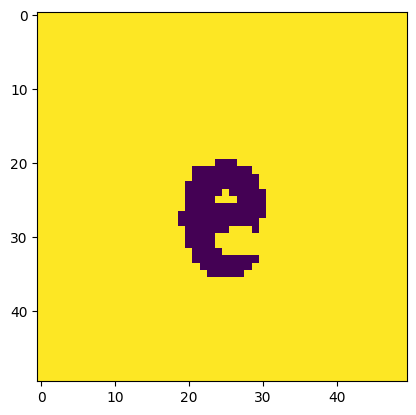

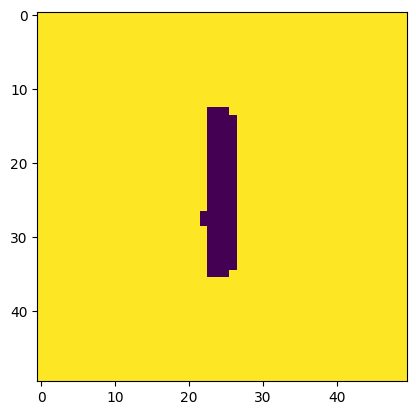

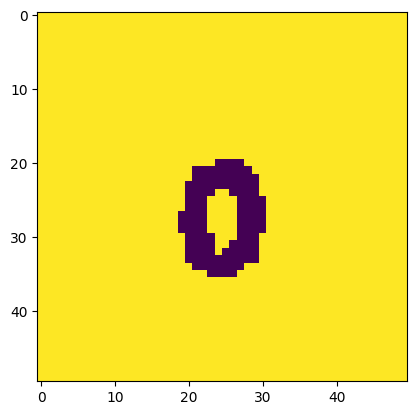

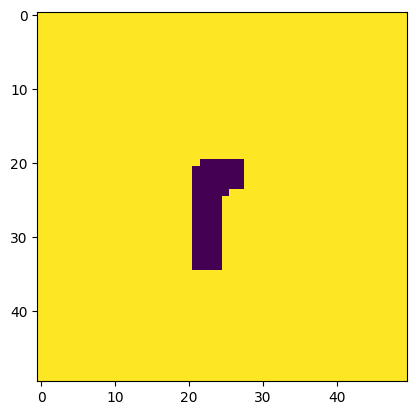

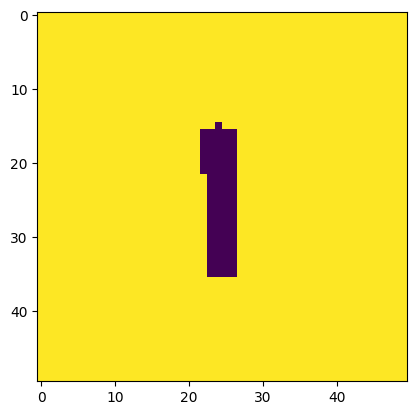

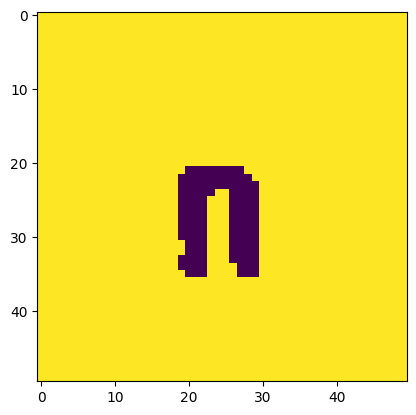

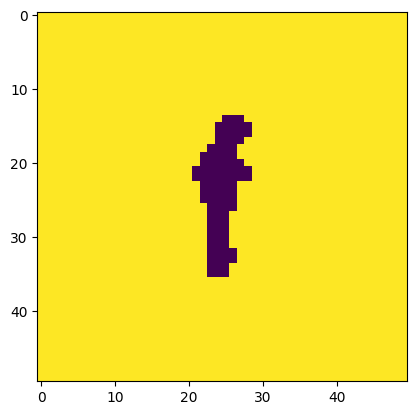

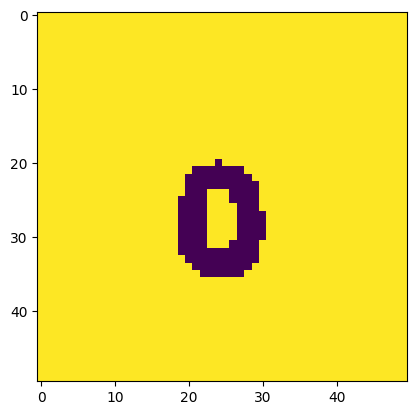

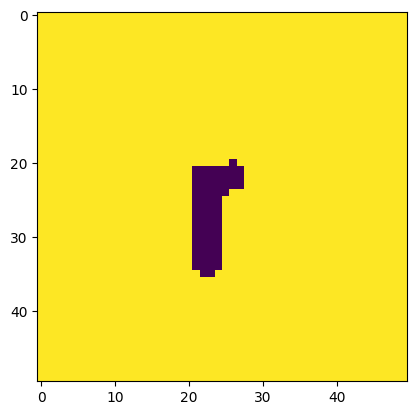

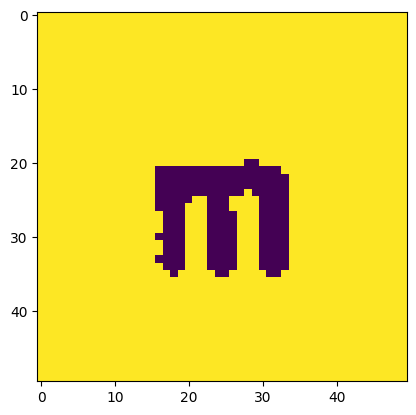

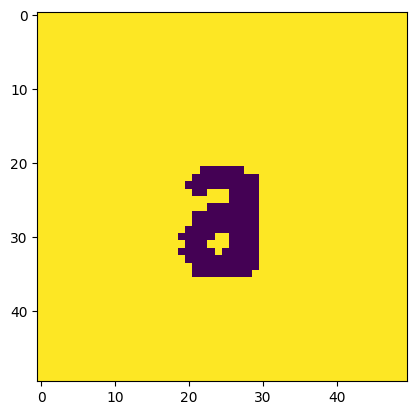

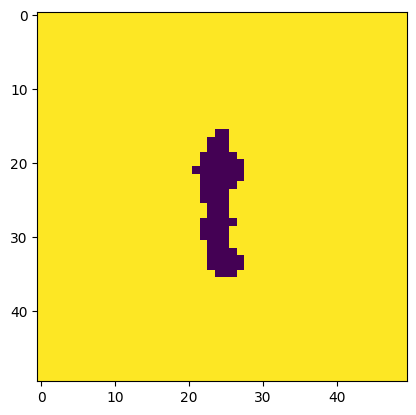

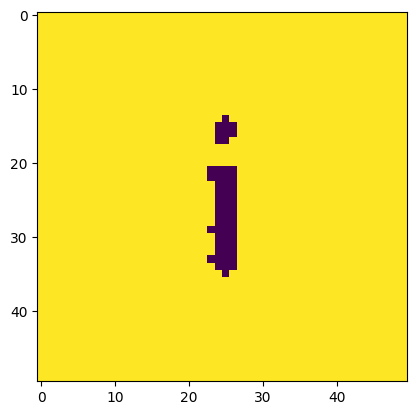

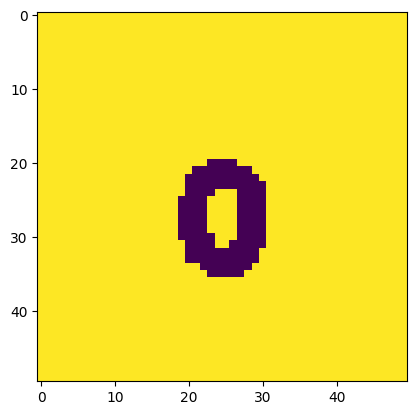

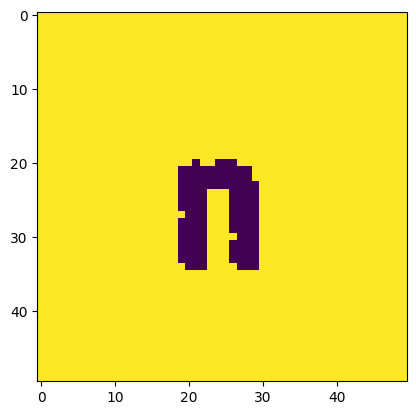

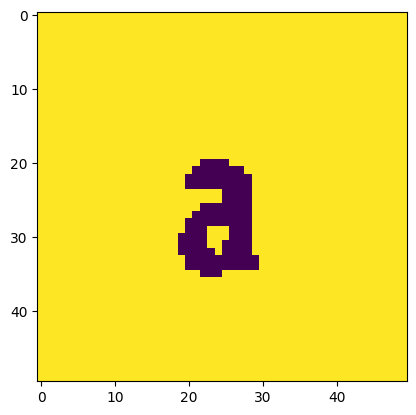

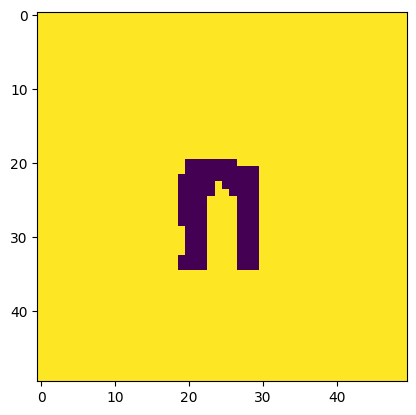

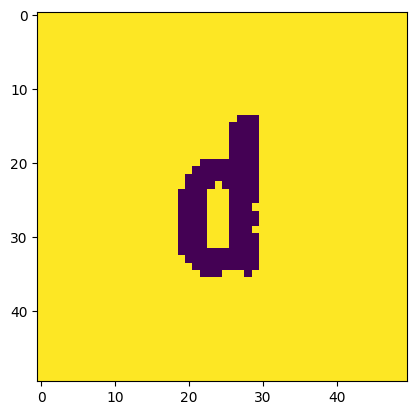

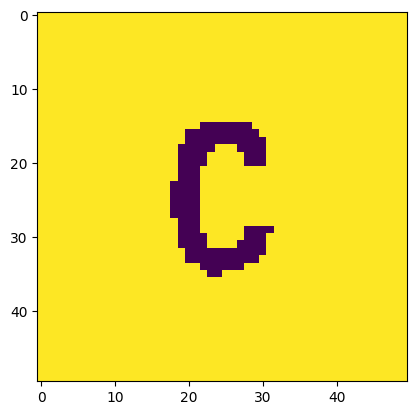

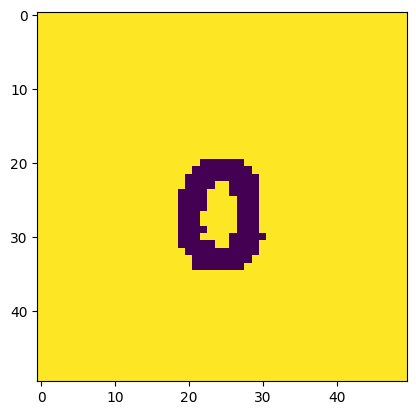

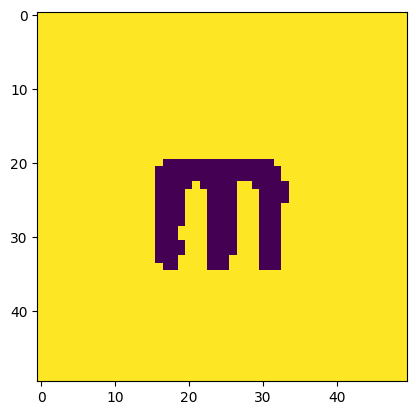

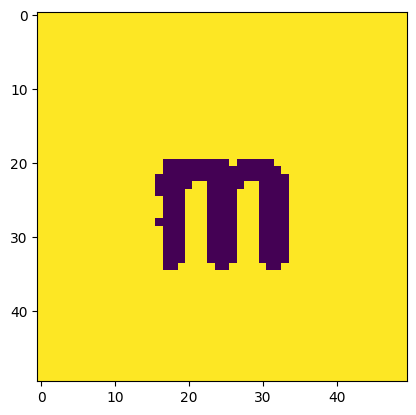

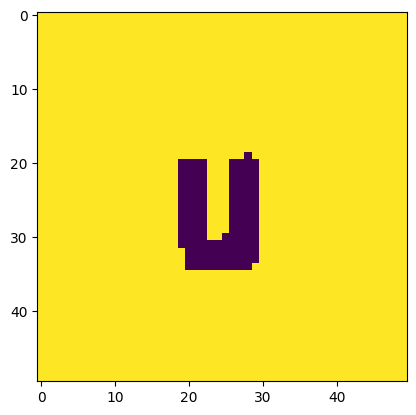

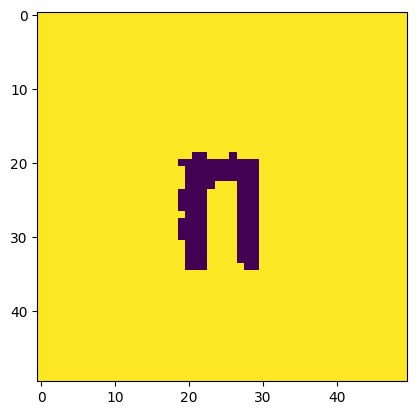

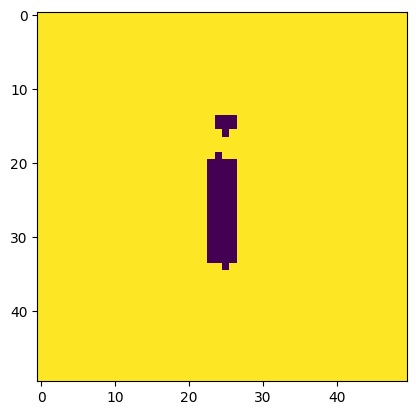

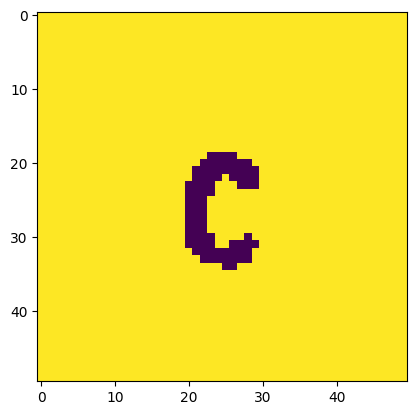

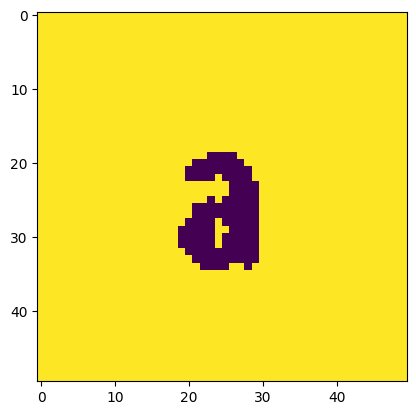

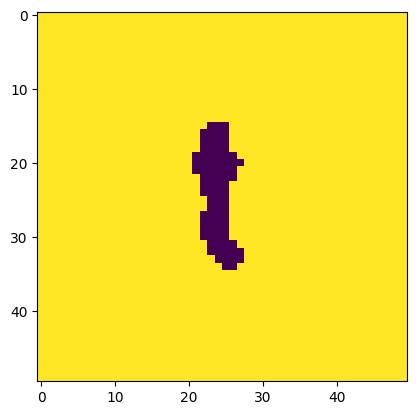

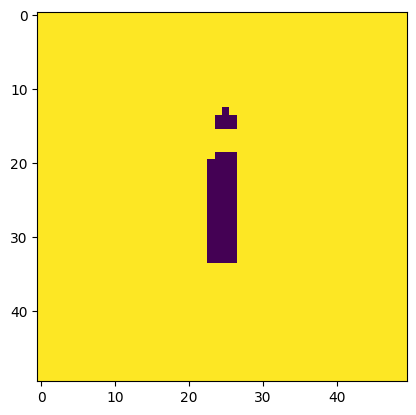

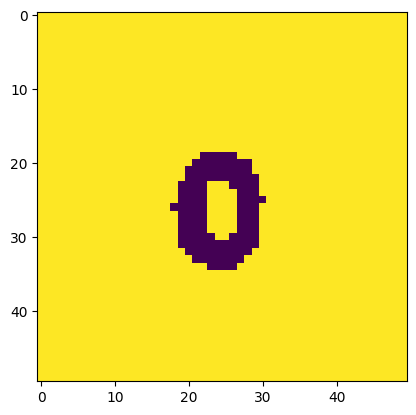

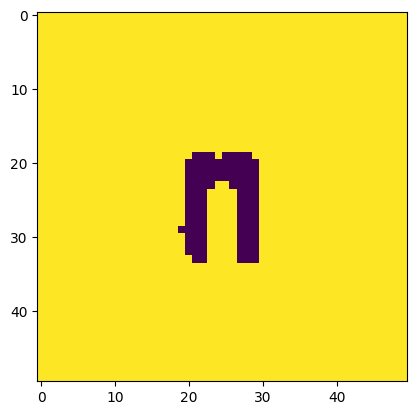

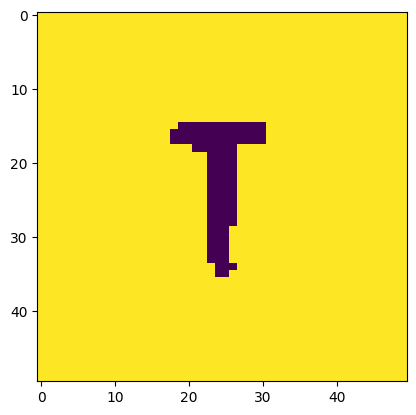

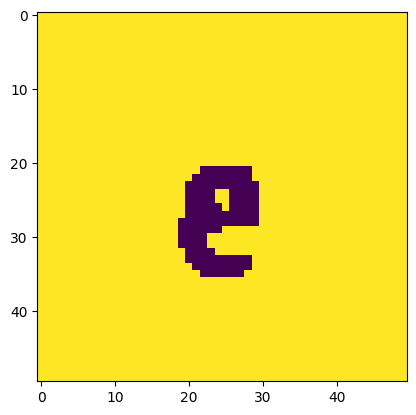

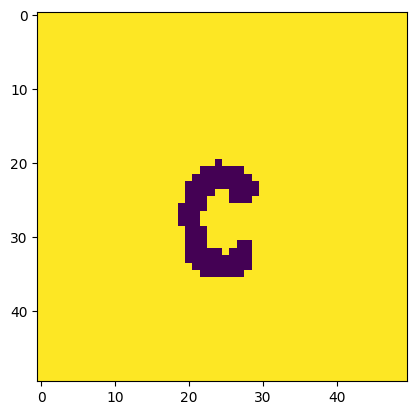

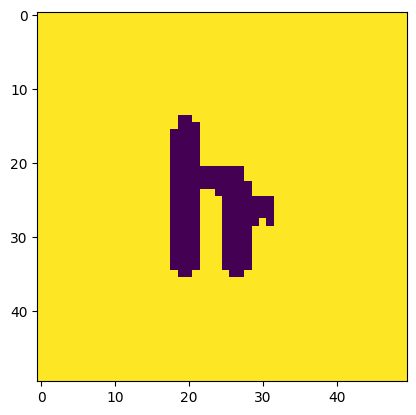

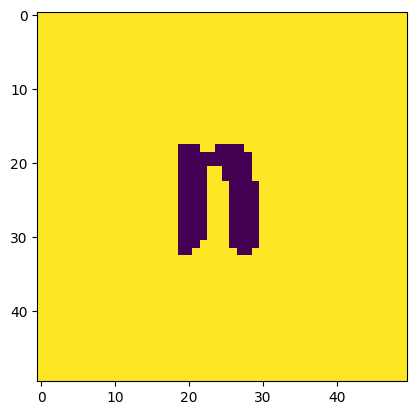

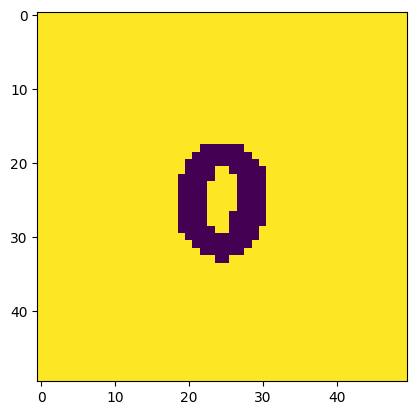

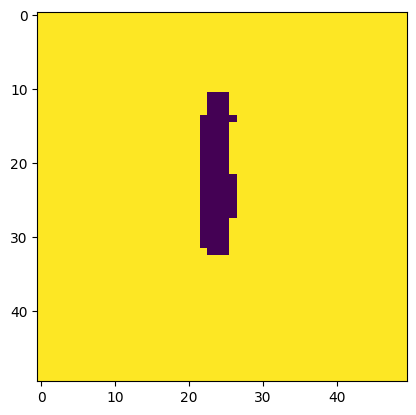

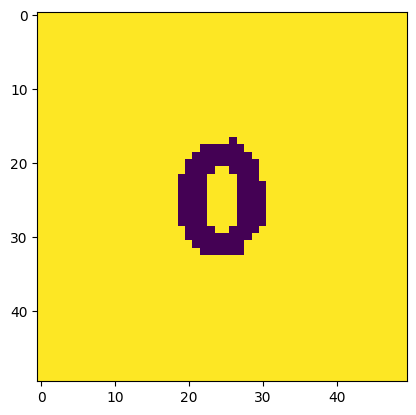

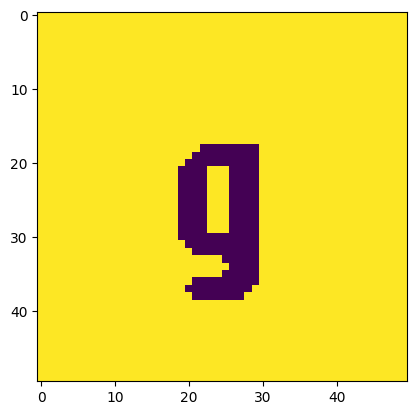

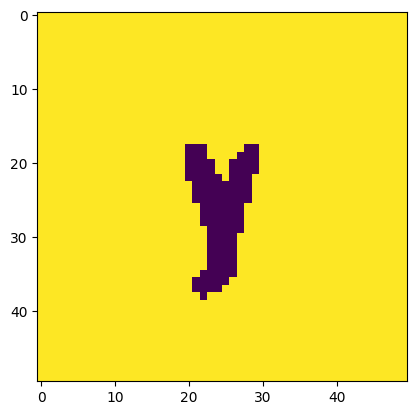

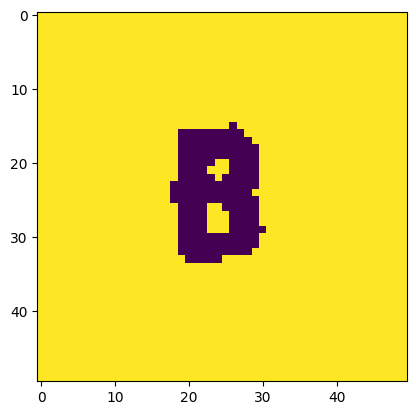

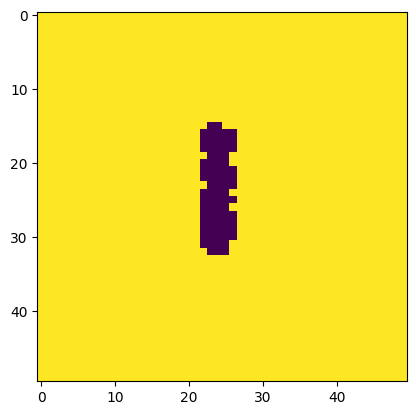

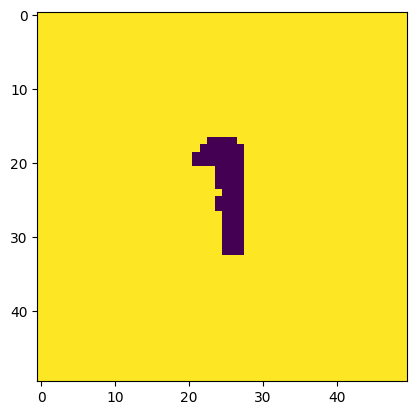

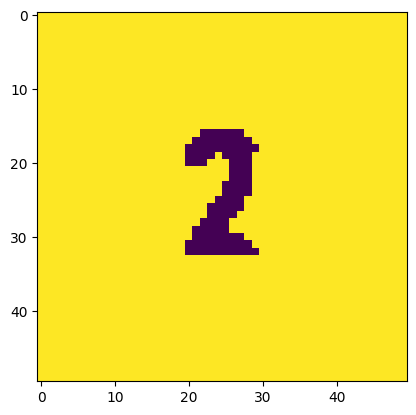

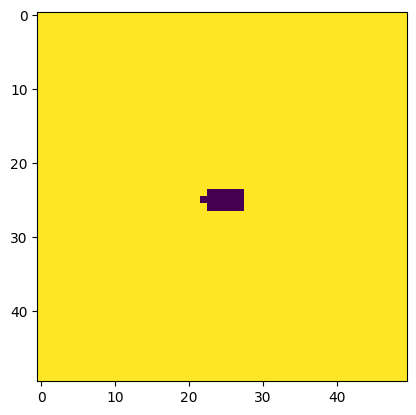

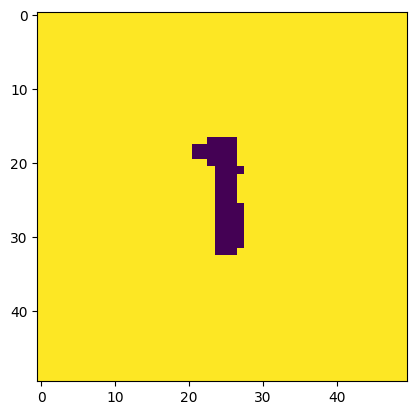

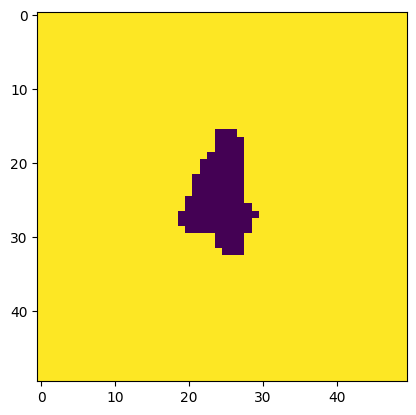

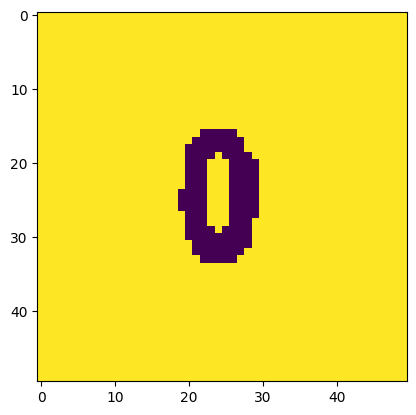

In [ ]:
img = cv2.imread("D:\\OneDrive - dsusth\\Study\\B2 Year\\Machine Learning and Data Mining II\\Project\\Student ID Image Train\\im5.jpg")

img_copy = np.array(img, copy = True)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 

# Dilate and Gaussian Blur
mask = cv2.dilate(edges, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), iterations = 3) 
mask = cv2.GaussianBlur(mask,(5,5),0)

# Find convex hull of contour with largest area
contours, _ = cv2.findContours(image=mask, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
page = sorted(contours, key=cv2.contourArea, reverse= True)[0]
page = cv2.convexHull(page, False)

# Create a binary image with convex hull
blank_bin = np.zeros_like(img)
cv2.fillPoly(blank_bin, pts =[page], color=(255,255,255))
blank_bin = cv2.cvtColor(blank_bin, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection and contour again to get the outer line of the convex hull
edge_hull = cv2.Canny(image=blank_bin, threshold1=100, threshold2=200)
contours, _ = cv2.findContours(image=edge_hull, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
blank_copy = np.zeros_like(img)
cv2.drawContours(blank_copy, contours, -1, (255,255,255), 1)

# Use HoughLinesP to detect straight lines
edge_copy = np.zeros_like(edge_hull)
lines = cv2.HoughLinesP(edge_hull, 1, np.pi/180, 60, minLineLength=10, maxLineGap=250)

# Combine similar lines, then take 4 longest lines as edges for outer quadrilateral of the image
lines = HoughBundler(min_distance=10,min_angle=5).process_lines(lines)
length = np.array([[None]*2 for i in range(lines.shape[0])])
for i in range(len(length)):
  length[i][0] = math.sqrt( (lines[i][0][2]-lines[i][0][0])**2 + (lines[i][0][3] - lines[i][0][1])**2 )
  length[i][1] = i
length_copy = np.flip(length[length[:,0].argsort()])[:4,0]
lines_copy = np.array([None]*4)
for i in range(lines_copy.shape[0]):
  lines_copy[i] = lines[length_copy[i]]
lines = lines_copy

# Extends lines, then use goodFeaturesToTrack to get corners of the quadrilateral, after that find its convex hull
edge_copy = np.zeros_like(edges)
for i in range(4):
  drawLine(edge_copy, lines[i][0][0], lines[i][0][1], lines[i][0][2], lines[i][0][3])
corners = cv2.convexHull(np.array(cv2.goodFeaturesToTrack(edge_copy,4,0.01,10), dtype = np.int32), False)
edge_copy = np.zeros_like(edges)

# Fill the convex polygon, find the contours of it
cv2.fillPoly(edge_copy, [corners], color = (255,255,255))
contours, _ = cv2.findContours(image = edge_copy, mode = cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# Rearrange and linear transformation to get output cut image
output_size = [860, 540]
corners = np.float32(rearrange_points(corners))
destination = np.float32([[0,output_size[1]], [output_size[0],output_size[1]], [output_size[0],0], [0,0]])
matrix = cv2.getPerspectiveTransform(corners, destination)
output = cv2.warpPerspective(img_copy, matrix, output_size)

# Convert cut to grayscale
img = output
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Get cut section of each information section
information_coor = [[385, 240, 460, 50], [385, 290, 180, 50], [695, 290, 150, 50], [385, 330, 210, 50], [695, 330, 150, 50], [385, 380, 460, 100], [60, 440, 200, 35]]
information_image = [None]*7
for i in range(7):
  information_image[i] = getImage(gray, information_coor[i])

# Get the outer contour of each words
information_contours = [None]*7
for i in range(7):
  information_contours[i] = getWordContours(information_image[i])

# Get bounding box of each words
word_bounding_box = [[]for _ in range(7)]
for i in range(7):
  image = np.array(information_image[i], copy = True)
  word_bounding_box[i] = [None]*len(information_contours[i])
  for c in range(len(information_contours[i])):
    word_bounding_box[i][c] = cv2.boundingRect(information_contours[i][c])

# Sort by left to right, top to bottom
for info in range(len(word_bounding_box)):
  y_mean = 0
  for box in word_bounding_box[info]:
    y_mean += box[1]
  y_mean /= len(word_bounding_box[info])
  word_bounding_box[info] = sorted(word_bounding_box[info], key=lambda x: x[0])
  for i in range(len(word_bounding_box[info])):
    if word_bounding_box[info][i][1] > y_mean:
      word_bounding_box[info].append(word_bounding_box[info][i])
      word_bounding_box[info].pop(i)
      i-=1

# Get threshold
word_image = [[]for _ in range(7)]
word_image_thresh = [[]for _ in range(7)]
word_image_thresh_mask = [[]for _ in range(7)]
for i in range(7):
  image = np.array(information_image[i], copy = True)
  for c in range(len(information_contours[i])):
    word_image[i].append(getImage(information_image[i], word_bounding_box[i][c]))
    word_image_thresh[i].append(getImage(information_image[i], word_bounding_box[i][c]))
    word_image_thresh_mask[i].append(getImage(information_image[i], word_bounding_box[i][c]))

for i in range(len(word_image_thresh)):
  for j in range(len(word_image_thresh[i])):
    ret,word_image_thresh[i][j] = cv2.threshold(word_image_thresh[i][j],100,255,cv2.THRESH_BINARY_INV)
    ret,word_image_thresh_mask[i][j] = cv2.threshold(word_image_thresh_mask[i][j],100,255,cv2.THRESH_BINARY_INV)

# Get a box for every letters
word_box = []
for i in range(len(word_image_thresh_mask)):
  word_box.append([])
  for j in range(len(word_image_thresh_mask[i])):
    word_box[i].append([])
    kernel_horizontal = np.array([[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0]])
    mask = cv2.filter2D(word_image_thresh_mask[i][j], -1, kernel_horizontal)
    for _ in range(20):
      mask = cv2.filter2D(mask, -1, kernel_horizontal)
    contours = getLetterContours(mask)
    box = [None]*len(contours)
    for c in range(len(contours)):
      box[c] = cv2.boundingRect(contours[c])
    box = sorted(box,key=lambda x: x[0], reverse = False)
    for c in range(len(contours)):
      blank_box = np.zeros((50,50))
      box[c] = getImage(word_image_thresh[i][j], box[c])
      h,w = box[c].shape
      blank_box[int(25-h/2):int(25-h/2)+h, int(25-w/2):int(25-w/2)+w] = box[c][0:h, 0:w]
      np.ones((3,3), np.uint8)
      blank_box = flipBit(blank_box)
      word_box[i][j].append(blank_box)

for i in word_box:
    for j in i:
        for k in j:
            plt.imshow(k)
            plt.show()

In [ ]:
import os
import shutil

folder_path = "D:\OneDrive - dsusth\Study\B2 Year\Machine Learning and Data Mining II\Project\Image\main_folders"

try:
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' deleted successfully.")
except OSError as e:
    print(f"Error: {folder_path} : {e.strerror}")

 # Directory
directory = "main_folders"
  
# Parent Directory path
parent_dir = "Image"
  
# Path
path = os.path.join(parent_dir, directory)
  
# Create the directory
# 'GeeksForGeeks' in
# '/home / User / Documents'

# Check if directory already exists
if not os.path.exists(path):
    # Create the directory
    os.mkdir(path)
    print("Directory '%s' created" % directory)
else:
    print("Directory '%s' already exists" % directory)

# Create subdirectories for i, j, and k
for i in range(len(word_box)):
    i_folder = os.path.join(path, f"folder_{i}")
    if not os.path.exists(i_folder):
        os.mkdir(i_folder)
    for j in range(len(word_box[i])):
        j_folder = os.path.join(i_folder, f"subfolder_{j}")
        if not os.path.exists(j_folder):
            os.mkdir(j_folder)
        for k in range(len(word_box[i][j])):
            letter_path = os.path.join(j_folder, 'letter_{}.jpg'.format(k))
            cv2.imwrite(letter_path, word_box[i][j][k])

Folder 'D:\OneDrive - dsusth\Study\B2 Year\Machine Learning and Data Mining II\Project\Image\main_folders' deleted successfully.
Directory 'main_folders' created


Return list of information

In [ ]:
folder = ["Full_Name", "Dob", "Gender", "Intake", "Course", "Major", "Id"]
list_of_folder = []
for i in range(len(word_box)):
    if i == 1:
        string_folder = ""
        for j in range(len(word_box[i])):
            for k in range(len(word_box[i][j])):
                if k == 2 or k == 5:
                    string_folder += "/"
                img = cv2.imread(f"Image/main_folders/folder_{i}/subfolder_{j}/letter_{k}.jpg")
                string_folder += predict_digits(model_digits, img)
        list_of_folder.append(string_folder)
    elif i == 3:
        string_folder = ""
        for j in range(len(word_box[i])):
            for k in range(len(word_box[i][j])):
                if k == 4:
                    string_folder += "-"
                img = cv2.imread(f"Image/main_folders/folder_{i}/subfolder_{j}/letter_{k}.jpg")
                string_folder += predict_digits(model_digits, img)
        list_of_folder.append(string_folder)
    elif i == 6:
        string_folder = ""
        for j in range(len(word_box[i])):
            for k in range(len(word_box[i][j])):
                if k == 0 or k == 1:
                    img = cv2.imread(f"Image/main_folders/folder_{i}/subfolder_{j}/letter_{k}.jpg")
                    string_folder += predict_letter(model, img)
                elif k == 4:
                    string_folder += "-"
                else:
                    img = cv2.imread(f"Image/main_folders/folder_{i}/subfolder_{j}/letter_{k}.jpg")
                    string_folder += predict_digits(model_digits, img)
        list_of_folder.append(string_folder)
    elif i == 0:
        string_folder = ""
        for j in range(len(word_box[i])):
            for k in range(len(word_box[i][j])):
                img = cv2.imread(f"Image/main_folders/folder_{i}/subfolder_{j}/letter_{k}.jpg")
                string_folder += predict_letter(model, img)
            if j < len(word_box[i]) - 1:
                string_folder += " "
        list_of_folder.append(string_folder)
    else:
        string_folder = ""
        for j in range(len(word_box[i])):
            for k in range(len(word_box[i][j])):
                img = cv2.imread(f"Image/main_folders/folder_{i}/subfolder_{j}/letter_{k}.jpg")
                string_folder += predict_letter(model, img)
        list_of_folder.append(string_folder)

print(list_of_folder)


1/1 [==============================] - 2s 2s/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.1478604e-26 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.3546793e-25 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.2421063e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
1/1 [==============================] - 0s 89ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0109628e-21 0.0000000e+00
  0.0000000e+00 3.0568090e-28 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
1/1 [==============================] - 0s 52ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0.]]
1/1 [=